# 2017 StackOverflow survey data

This file will explore the 2017 StackOverflow survey data. We will walk through the following 3 questions and find the answers by looking at the date.  

Q1. Find the correlation between highset level of formal education and the company size the correnpondent work for.<br>
Q2. Let's find out if it is true that the longer a person has worked for as a programmer, the more satisfied the person could be.<br>
Q3. What makes people satisfied with their job?

In [113]:
import pandas as pd
import numpy as np
import os
from collections import OrderedDict, defaultdict

Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:

- Gather necessary data to answer your questions<br>
- Handle categorical and missing data<br>
- Provide insight into the methods you chose and why you chose them

Analyze, Model, and Visualize:

- Provide a clear connection between your business questions and how the data answers them.

In [114]:
os.listdir()

['.ipynb_checkpoints',
 'survey_results_public.csv',
 'survey_results_schema.csv',
 'Untitled.ipynb']

In [115]:
df = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

In [116]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [117]:
df_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."


### Q1. Find the correlation between highset level of formal education and the company size the correnpondent work for.

Try the words of interest to answer the question 1.

In [118]:
def get_relevant_questions(words_of_interest):
    df_q_set = pd.DataFrame(columns=df_schema.columns)
    for word in words_of_interest:
        q_set = df_schema[df_schema.Question.str.contains(word)]
        df_q_set = df_q_set.append(q_set, ignore_index=True)
    df_q_set.drop_duplicates(ignore_index=True, inplace=True)
    return df_q_set.index, df_q_set

In [119]:
Obs1_words = ['formal', 'education', 'company', 'size']

Obs1_idx, Obs1_q = get_relevant_questions(Obs1_words)
Obs1_q

,Column,Question
0,University,"Are you currently enrolled in a formal, degree..."
1,FormalEducation,Which of the following best describes the high...
2,EducationImportant,"Overall, how important has your formal schooli..."
3,EducationTypes,Outside of your formal schooling and education...
4,HighestEducationParents,What is the highest level of education receive...
5,CompanySize,"In terms of the number of employees, how large..."
6,CompanyType,Which of the following best describes the type...
7,AssessJobProjects,When you're assessing potential jobs to apply ...
8,AssessJobLeaders,When you're assessing potential jobs to apply ...
9,AssessJobDiversity,When you're assessing potential jobs to apply ...


In [120]:
q_of_interest = ['FormalEducation', 'EducationImportant', 'CompanySize', 'CompanyType']

In [121]:
df_q1 = df[q_of_interest]
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FormalEducation     51392 non-null  object
 1   EducationImportant  23355 non-null  object
 2   CompanySize         38922 non-null  object
 3   CompanyType         38823 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


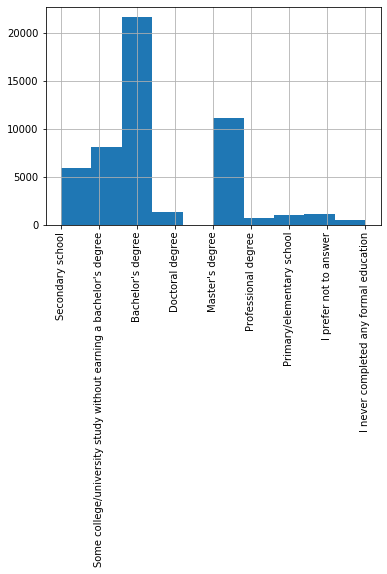

In [122]:
df_q1.FormalEducation.hist(xrot=90);

This suggests Bachelor's degree holders are the majority. Let's encode the education level and company size to see the correlation.

In [123]:
edu_set = list(set(df_q1.FormalEducation))

In [124]:
edu_set

['Secondary school',
 'Professional degree',
 'I prefer not to answer',
 'I never completed any formal education',
 "Master's degree",
 "Bachelor's degree",
 'Doctoral degree',
 'Primary/elementary school',
 "Some college/university study without earning a bachelor's degree"]

In [178]:
edu_dict = {'Secondary school': 3,
         'Professional degree': 7,
         'I prefer not to answer': 0,
         'I never completed any formal education': 1,
         "Master's degree": 6,
         "Bachelor's degree": 5,
         'Doctoral degree': 8,
         'Primary/elementary school': 2,
         "Some college/university study without earning a bachelor's degree": 4}

In [179]:
def encode_col(replace_dict, df, col):    
    try:
        df[''.join([col, '_factor'])] = df[col].replace(replace_dict)
    except:
           pass
    return df

In [180]:
encode_col(edu_dict, df_q1, 'FormalEducation')

C:\Users\Sue\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FormalEducation,EducationImportant,CompanySize,CompanyType,FormalEducation_factor,CompanySize_factor
0,Secondary school,NaN,NaN,NaN,3,NaN
1,Some college/university study without earning ...,NaN,20 to 99 employees,"Privately-held limited company, not in startup...",4,4.0
2,Bachelor's degree,Not very important,"10,000 or more employees",Publicly-traded corporation,5,9.0
3,Doctoral degree,NaN,"10,000 or more employees",Non-profit/non-governmental organization or pr...,8,9.0
4,Master's degree,NaN,10 to 19 employees,"Privately-held limited company, not in startup...",6,3.0
...,...,...,...,...,...,...
51387,Bachelor's degree,Somewhat important,100 to 499 employees,I don't know,5,5.0
51388,Master's degree,NaN,100 to 499 employees,Government agency or public school/university,6,5.0
51389,Some college/university study without earning ...,Not very important,10 to 19 employees,I prefer not to answer,4,3.0
51390,Bachelor's degree,NaN,Fewer than 10 employees,"Sole proprietorship or partnership, not in sta...",5,2.0


In [181]:
comp_set = set(df_q1['CompanySize'].dropna())
comp_set

{'1,000 to 4,999 employees',
 '10 to 19 employees',
 '10,000 or more employees',
 '100 to 499 employees',
 '20 to 99 employees',
 '5,000 to 9,999 employees',
 '500 to 999 employees',
 'Fewer than 10 employees',
 "I don't know",
 'I prefer not to answer'}

In [182]:
comp_dict = {'1,000 to 4,999 employees': 7,
             '10 to 19 employees': 3,
             '10,000 or more employees': 9,
             '100 to 499 employees': 5,
             '20 to 99 employees': 4,
             '5,000 to 9,999 employees': 8,
             '500 to 999 employees': 6,
             'Fewer than 10 employees': 2,
             "I don't know": 1,
             'I prefer not to answer': 0}

In [183]:
encode_col(comp_dict, df_q1, 'CompanySize')

C:\Users\Sue\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FormalEducation,EducationImportant,CompanySize,CompanyType,FormalEducation_factor,CompanySize_factor
0,Secondary school,NaN,NaN,NaN,3,NaN
1,Some college/university study without earning ...,NaN,20 to 99 employees,"Privately-held limited company, not in startup...",4,4.0
2,Bachelor's degree,Not very important,"10,000 or more employees",Publicly-traded corporation,5,9.0
3,Doctoral degree,NaN,"10,000 or more employees",Non-profit/non-governmental organization or pr...,8,9.0
4,Master's degree,NaN,10 to 19 employees,"Privately-held limited company, not in startup...",6,3.0
...,...,...,...,...,...,...
51387,Bachelor's degree,Somewhat important,100 to 499 employees,I don't know,5,5.0
51388,Master's degree,NaN,100 to 499 employees,Government agency or public school/university,6,5.0
51389,Some college/university study without earning ...,Not very important,10 to 19 employees,I prefer not to answer,4,3.0
51390,Bachelor's degree,NaN,Fewer than 10 employees,"Sole proprietorship or partnership, not in sta...",5,2.0


In [184]:
df_edu_comp = df_q1[['FormalEducation_factor', 'CompanySize_factor']].dropna()

df_edu_comp['FormalEducation_factor'].corr(df_edu_comp['CompanySize_factor'])

0.12480312420334169

There is a weak relation between education level and company size. Let's examine the preference of PhD, MS, and Bachelor holders.  

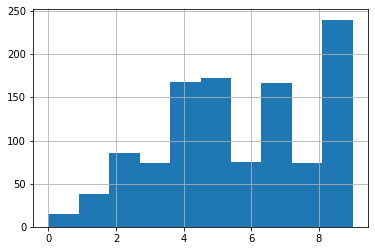

In [185]:
# PhD degree graduate
df_q1[df_q1['FormalEducation']=='Doctoral degree']['CompanySize_factor'].hist();

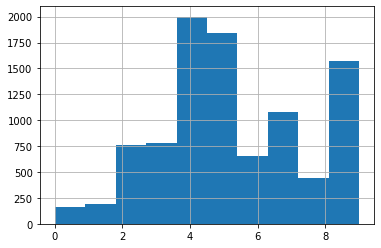

In [186]:
# MS degree graduate
df_q1[df_q1['FormalEducation']=="Master's degree"]['CompanySize_factor'].hist();

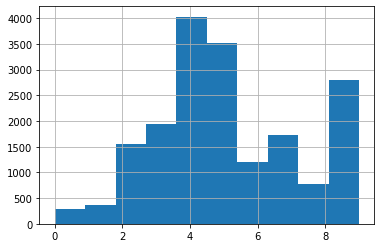

In [187]:
# Bachelor's degree graduate
df_q1[df_q1['FormalEducation']=="Bachelor's degree"]['CompanySize_factor'].hist();

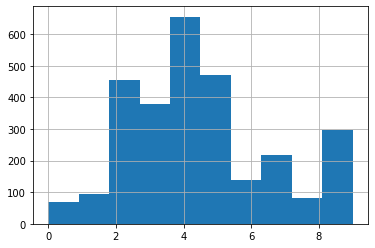

In [188]:
# Secondary degree graduate
df_q1[df_q1['FormalEducation']=="Secondary school"]['CompanySize_factor'].hist();

### Q1 Answer: 
The correlation between education and company size is negligible. When seprately observed, Doctoral degree holders work for large size companies while the rest work for mid size companies.

### Q2. Let's find out if it is true that the longer a person has worked for as a programmer, the more satisfied the person could be.

In [189]:
df_q2 = df[['YearsProgram', 'YearsCodedJob', 'Overpaid', 'CareerSatisfaction', 'JobSatisfaction']]
df_q2

,YearsProgram,YearsCodedJob,Overpaid,CareerSatisfaction,JobSatisfaction
0,2 to 3 years,NaN,NaN,NaN,NaN
1,9 to 10 years,NaN,NaN,NaN,NaN
2,20 or more years,20 or more years,Neither underpaid nor overpaid,8.0,9.0
3,14 to 15 years,9 to 10 years,NaN,6.0,3.0
4,20 or more years,10 to 11 years,NaN,6.0,8.0
...,...,...,...,...,...
51387,6 to 7 years,1 to 2 years,Greatly underpaid,7.0,3.0
51388,2 to 3 years,NaN,NaN,NaN,NaN
51389,Less than a year,Less than a year,NaN,10.0,10.0
51390,17 to 18 years,3 to 4 years,Greatly underpaid,6.0,7.0


In [190]:
code_years = set(df_q2['YearsCodedJob'])
code_years

{'1 to 2 years',
 '10 to 11 years',
 '11 to 12 years',
 '12 to 13 years',
 '13 to 14 years',
 '14 to 15 years',
 '15 to 16 years',
 '16 to 17 years',
 '17 to 18 years',
 '18 to 19 years',
 '19 to 20 years',
 '2 to 3 years',
 '20 or more years',
 '3 to 4 years',
 '4 to 5 years',
 '5 to 6 years',
 '6 to 7 years',
 '7 to 8 years',
 '8 to 9 years',
 '9 to 10 years',
 'Less than a year',
 nan}

In [191]:
df_q2['YearsCode_encoded'] = df_q2['YearsCodedJob'].str.split(' ').str[0].replace('Less', '1')
df_q2

C:\Users\Sue\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YearsProgram,YearsCodedJob,Overpaid,CareerSatisfaction,JobSatisfaction,YearsCode_encoded
0,2 to 3 years,NaN,NaN,NaN,NaN,NaN
1,9 to 10 years,NaN,NaN,NaN,NaN,NaN
2,20 or more years,20 or more years,Neither underpaid nor overpaid,8.0,9.0,20
3,14 to 15 years,9 to 10 years,NaN,6.0,3.0,9
4,20 or more years,10 to 11 years,NaN,6.0,8.0,10
...,...,...,...,...,...,...
51387,6 to 7 years,1 to 2 years,Greatly underpaid,7.0,3.0,1
51388,2 to 3 years,NaN,NaN,NaN,NaN,NaN
51389,Less than a year,Less than a year,NaN,10.0,10.0,1
51390,17 to 18 years,3 to 4 years,Greatly underpaid,6.0,7.0,3


In [192]:
career_code = df_q2[['YearsCode_encoded', 'CareerSatisfaction']].dropna()
career_code['YearsCode_encoded'] = career_code['YearsCode_encoded'].astype(float)

In [193]:
career_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40567 entries, 2 to 51391
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCode_encoded   40567 non-null  float64
 1   CareerSatisfaction  40567 non-null  float64
dtypes: float64(2)
memory usage: 950.8 KB


In [194]:
career_code.corr()

,YearsCode_encoded,CareerSatisfaction
YearsCode_encoded,1.000000,0.084362
CareerSatisfaction,0.084362,1.000000


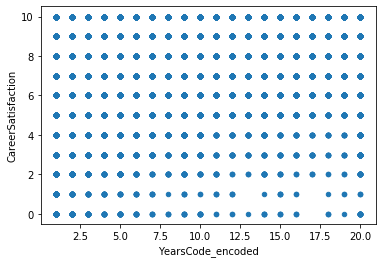

In [195]:
career_code.plot.scatter(x='YearsCode_encoded', y='CareerSatisfaction');

It is interesting to see there is no correlation between Year of Code and Career Satisfaction.

In [196]:
set(df_q2['Overpaid'])

{'Greatly overpaid',
 'Greatly underpaid',
 'Neither underpaid nor overpaid',
 'Somewhat overpaid',
 'Somewhat underpaid',
 nan}

In [197]:
overpaid_dict = {'Greatly overpaid': 4,
                 'Greatly underpaid': 0,
                 'Neither underpaid nor overpaid':2,
                 'Somewhat overpaid': 3,
                 'Somewhat underpaid': 1
                }

In [198]:
encode_col(overpaid_dict, df_q2, 'Overpaid')

C:\Users\Sue\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,YearsProgram,YearsCodedJob,Overpaid,CareerSatisfaction,JobSatisfaction,YearsCode_encoded,Overpaid_factor
0,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN
1,9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN
2,20 or more years,20 or more years,Neither underpaid nor overpaid,8.0,9.0,20,2.0
3,14 to 15 years,9 to 10 years,NaN,6.0,3.0,9,NaN
4,20 or more years,10 to 11 years,NaN,6.0,8.0,10,NaN
...,...,...,...,...,...,...,...
51387,6 to 7 years,1 to 2 years,Greatly underpaid,7.0,3.0,1,0.0
51388,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN
51389,Less than a year,Less than a year,NaN,10.0,10.0,1,NaN
51390,17 to 18 years,3 to 4 years,Greatly underpaid,6.0,7.0,3,0.0


In [199]:
overpaid_yearscode = df_q2[['YearsCode_encoded', 'Overpaid_factor']].dropna()
overpaid_yearscode

,YearsCode_encoded,Overpaid_factor
2,20,2.0
8,7,2.0
14,20,1.0
17,20,2.0
18,3,3.0
...,...,...
51371,5,2.0
51378,5,2.0
51382,1,1.0
51387,1,0.0


In [200]:
overpaid_yearscode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13330 entries, 2 to 51390
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsCode_encoded  13330 non-null  object 
 1   Overpaid_factor    13330 non-null  float64
dtypes: float64(1), object(1)
memory usage: 312.4+ KB


In [201]:
overpaid_yearscode['YearsCode_encoded'] = overpaid_yearscode['YearsCode_encoded'].astype(float)

In [202]:
overpaid_yearscode.corr()

,YearsCode_encoded,Overpaid_factor
YearsCode_encoded,1.000000,0.097708
Overpaid_factor,0.097708,1.000000


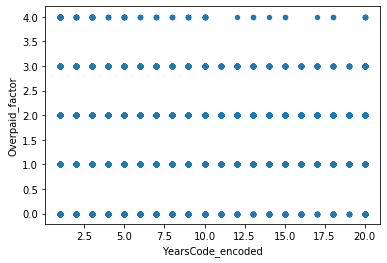

In [203]:
overpaid_yearscode.plot.scatter(x='YearsCode_encoded', y='Overpaid_factor');

### Q2 Answer: 
It is interesting to see there is no correlation between the years of code and {Overpaid or CareerSatisfaction}.

### Q3. What makes people satisfied with their job?

In [204]:
set(df['LearningNewTech'])

{'Agree',
 'Disagree',
 'Somewhat agree',
 'Strongly agree',
 'Strongly disagree',
 nan}

In [205]:
newtech_dict = {'Agree': 3,
                'Disagree': 1,
                'Somewhat agree': 2,
                'Strongly agree': 4,
                'Strongly disagree': 0
                }

In [206]:
df_q3 = df[['LearningNewTech', 'CareerSatisfaction', 'BuildingThings']]

In [207]:
encode_col(newtech_dict, df_q3, 'LearningNewTech')

C:\Users\Sue\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LearningNewTech,CareerSatisfaction,BuildingThings,LearningNewTech_factor
0,Agree,NaN,Strongly agree,3.0
1,NaN,NaN,NaN,NaN
2,Strongly agree,8.0,Strongly agree,4.0
3,Strongly agree,6.0,Strongly agree,4.0
4,NaN,6.0,NaN,NaN
...,...,...,...,...
51387,Strongly agree,7.0,Agree,4.0
51388,NaN,NaN,NaN,NaN
51389,NaN,10.0,NaN,NaN
51390,Strongly agree,6.0,Agree,4.0


In [208]:
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LearningNewTech         31304 non-null  object 
 1   CareerSatisfaction      42695 non-null  float64
 2   BuildingThings          31234 non-null  object 
 3   LearningNewTech_factor  31304 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.6+ MB


In [209]:
careersatisfaction_newtech = df_q3[['CareerSatisfaction', 'LearningNewTech_factor']]
careersatisfaction_newtech.corr()

,CareerSatisfaction,LearningNewTech_factor
CareerSatisfaction,1.000000,0.124269
LearningNewTech_factor,0.124269,1.000000


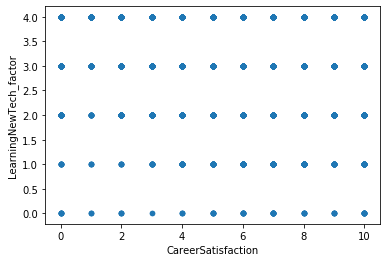

In [210]:
careersatisfaction_newtech.plot.scatter(x='CareerSatisfaction', y='LearningNewTech_factor');

In [211]:
set(df['BuildingThings'])

{'Agree',
 'Disagree',
 'Somewhat agree',
 'Strongly agree',
 'Strongly disagree',
 nan}

In [212]:
encode_col(newtech_dict, df_q3, 'BuildingThings')

C:\Users\Sue\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LearningNewTech,CareerSatisfaction,BuildingThings,LearningNewTech_factor,BuildingThings_factor
0,Agree,NaN,Strongly agree,3.0,4.0
1,NaN,NaN,NaN,NaN,NaN
2,Strongly agree,8.0,Strongly agree,4.0,4.0
3,Strongly agree,6.0,Strongly agree,4.0,4.0
4,NaN,6.0,NaN,NaN,NaN
...,...,...,...,...,...
51387,Strongly agree,7.0,Agree,4.0,3.0
51388,NaN,NaN,NaN,NaN,NaN
51389,NaN,10.0,NaN,NaN,NaN
51390,Strongly agree,6.0,Agree,4.0,3.0


In [213]:
career_building = df_q3[['CareerSatisfaction', 'BuildingThings_factor']]

In [214]:
career_building.corr()

,CareerSatisfaction,BuildingThings_factor
CareerSatisfaction,1.000000,0.167563
BuildingThings_factor,0.167563,1.000000


### Q3 Answer: 
Although the correlation between Career Satisfaction and Buidling Things do not show a significant correlationship, the correlation value is the highest among what we have overserved so far. It seems the career satisfaction come from self active mind rather than the outer conditions such as salary, job proficiency, or education.